In [2]:
import pandas as pd
import numpy as np

In [3]:
data_train = pd.read_csv('train_data.csv', header=0, sep=',', index_col = 0)
data_valid = pd.read_csv('validation_data.csv', header=0, sep=',', index_col = 0)
data_train_valid = pd.read_csv('train_validation_data.csv', header=0, sep=',', index_col = 0)
data_test = pd.read_csv('test_data.csv', header=0, sep=',', index_col = 0)

In [4]:
X_train = data_train.drop('shares',1)
Y_train = data_train['shares']

X_valid = data_valid.drop('shares',1)
Y_valid = data_valid['shares']

X_train_valid = data_train_valid.drop('shares',1)
Y_train_valid = data_train_valid['shares']

X_test = data_test.drop('shares',1)
Y_test = data_test['shares']

In [5]:
from sklearn import preprocessing

X_train_final = pd.DataFrame(preprocessing.scale(X_train))

X_valid_final = pd.DataFrame(preprocessing.scale(X_valid))

X_train_valid_final = pd.DataFrame(preprocessing.scale(X_train_valid))

X_test_final = pd.DataFrame(preprocessing.scale(X_test))

Model

--- 15.491511344909668 seconds ---


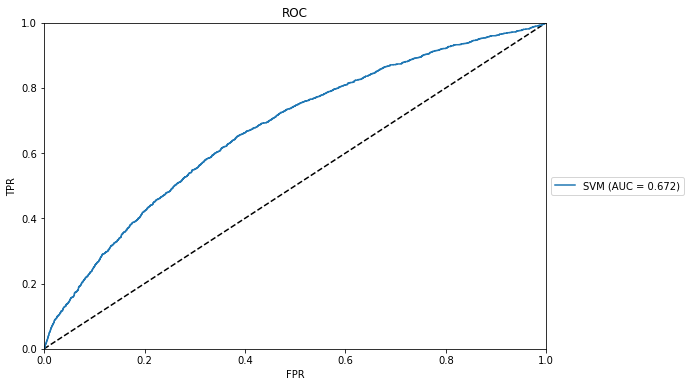

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.metrics import roc_curve, auc, roc_auc_score,confusion_matrix

import time
start_time = time.time()

plt.figure(figsize=(9,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')

#svm
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train_final, Y_train)
preds_svm = svm_model.decision_function(X_valid_final)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(Y_valid, preds_svm)
svm_roc_auc = auc(svm_fpr, svm_tpr)
svm_curve = plt.plot(svm_fpr, svm_tpr, label = 'SVM' + ' (AUC = %0.3f)' % svm_roc_auc)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

print("--- %s seconds ---" % (time.time() - start_time))

In [7]:
def SVM_RUN(k,c):
    svm_model = svm.SVC(kernel=k,C=c)
    svm_model.fit(X_train_final,Y_train)
    #auc
    preds_svm = svm_model.decision_function(X_valid_final)
    svm_fpr, svm_tpr, svm_thresholds = roc_curve(Y_valid, preds_svm)
    svm_auc = auc(svm_fpr, svm_tpr)
    #tpr
    true_positive=confusion_matrix(Y_valid,svm_model.predict(X_valid_final))[1][1]
    false_negative=confusion_matrix(Y_valid,svm_model.predict(X_valid_final))[1][0]
    true_positive_rate=true_positive/(true_positive+false_negative)
    return svm_auc, true_positive_rate

In [8]:
dict_svm={'kernal':[],'c':[],'auc_score':[],'tpr':[]}

kernals = ['linear','rbf','poly']
cs_1 = 10.0**np.arange(-5,1,)

start_time = time.time()
for k in kernals:
    for c in cs_1:
        auc_score, tpr = SVM_RUN(k,c)
        
        dict_svm['kernal'].append(k)
        dict_svm['c'].append(c)
        dict_svm['auc_score'].append(auc_score)
        dict_svm['tpr'].append(tpr)
        
        print(k+' '+str(c),"--- %s seconds ---" % (time.time() - start_time))
        
df_svm = pd.DataFrame(dict_svm)

linear 1e-05 --- 15.861215114593506 seconds ---
linear 0.0001 --- 31.651508331298828 seconds ---
linear 0.001 --- 46.077009201049805 seconds ---
linear 0.01 --- 60.45443272590637 seconds ---
linear 0.1 --- 75.87801098823547 seconds ---
linear 1.0 --- 95.80893921852112 seconds ---
rbf 1e-05 --- 126.00411128997803 seconds ---
rbf 0.0001 --- 156.73127913475037 seconds ---
rbf 0.001 --- 187.9966263771057 seconds ---
rbf 0.01 --- 216.43138480186462 seconds ---
rbf 0.1 --- 242.78125596046448 seconds ---
rbf 1.0 --- 268.7957899570465 seconds ---
poly 1e-05 --- 287.5194945335388 seconds ---
poly 0.0001 --- 307.21814370155334 seconds ---
poly 0.001 --- 327.4936172962189 seconds ---
poly 0.01 --- 344.17877101898193 seconds ---
poly 0.1 --- 361.77356338500977 seconds ---
poly 1.0 --- 388.57370042800903 seconds ---


In [9]:
print('Best auc based:')
print(df_svm[df_svm['auc_score']==df_svm['auc_score'].max()])
print('Best tpr based:')
print(df_svm[df_svm['tpr']==df_svm['tpr'].max()])

Best auc based:
   kernal    c  auc_score       tpr
10    rbf  0.1   0.679373  0.678414
Best tpr based:
  kernal     c  auc_score       tpr
9    rbf  0.01   0.664873  0.678965


<Figure size 432x288 with 0 Axes>

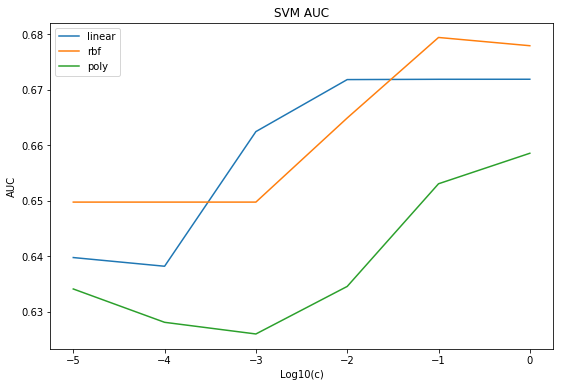

In [10]:
plt.clf()
plt.figure(figsize=(9,6))
plt.xlabel('Log10(c)')
plt.ylabel('AUC')
plt.title('SVM AUC')
for k in kernals:
    df_plot=df_svm[df_svm['kernal']==k]
    plt.plot(np.log10(df_plot['c']), df_plot['auc_score'], label = k)

plt.legend()

<Figure size 432x288 with 0 Axes>

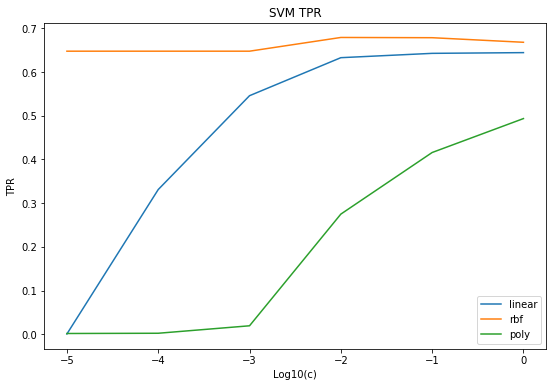

In [11]:
plt.clf()
plt.figure(figsize=(9,6))
plt.xlabel('Log10(c)')
plt.ylabel('TPR')
plt.title('SVM TPR')
for k in kernals:
    df_plot=df_svm[df_svm['kernal']==k]
    plt.plot(np.log10(df_plot['c']), df_plot['tpr'], label = k)

plt.legend()

In [12]:
best_auc_c=0.1

svm1 = svm.SVC(kernel='rbf',C=best_auc_c)
svm1.fit(X_train_valid_final,Y_train_valid)

preds_svm1 = svm1.decision_function(X_test_final)
svm1_fpr, svm1_tpr, svm1_thresholds = roc_curve(Y_test, preds_svm1)
svm1_auc_score = auc(svm1_fpr, svm1_tpr)

svm1_true_positive=confusion_matrix(Y_test,svm1.predict(X_test_final))[1][1]
svm1_false_negative=confusion_matrix(Y_test,svm1.predict(X_test_final))[1][0]
svm1_true_positive_rate=svm1_true_positive/(svm1_true_positive+svm1_false_negative)

print('best auc based auc is '+str(svm1_auc_score))
print('best auc based tpr is '+str(svm1_true_positive_rate))

best auc based auc is 0.6937159681596633
best auc based tpr is 0.6806806806806807


In [13]:
best_tpr_c=0.01

svm2 = svm.SVC(kernel='rbf',C=best_tpr_c)
svm2.fit(X_train_valid_final,Y_train_valid)

preds_svm2 = svm2.decision_function(X_test_final)
svm2_fpr, svm2_tpr, svm2_thresholds = roc_curve(Y_test, preds_svm2)
svm2_auc_score = auc(svm2_fpr, svm2_tpr)

svm2_true_positive=confusion_matrix(Y_test,svm2.predict(X_test_final))[1][1]
svm2_false_negative=confusion_matrix(Y_test,svm2.predict(X_test_final))[1][0]
svm2_true_positive_rate=svm2_true_positive/(svm2_true_positive+svm2_false_negative)

print('best auc based auc is '+str(svm2_auc_score))
print('best auc based tpr is '+str(svm2_true_positive_rate))

best auc based auc is 0.6772237510605684
best auc based tpr is 0.6686686686686687
